CREDIT CARD FRAUD DETECTION USING CNN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# import the dataset
data=pd.read_csv('creditcard.csv')
data.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [ ]:
# check the shape of the dataset
data.shape

(284807, 31)

In [ ]:
# we will check if there are any null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# we can check that how many values are present in the 'class' having values as 0 or 1
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# dividing the dataframe into fraud and non fraud data
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [ ]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [ ]:
# now we are going to select the 492 non-fraud entries from the dataframe 
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [ ]:
data=fraud.append(non_fraud, ignore_index=True)
data

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0       406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
1       472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
2      4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
3      6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
4      7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1
..        ...       ...       ...       ...  ...       ...       ...     ...    ...
979  151942.0  0.136902  1.009859 -0.414207  ...  0.221093  0.084098    1.98      0
980  120032.0  2.020927  0.166229 -1.588259  ... -0.061526 -0.037354    0.99      0
981  160639.0  2.050731  0.195228 -1.702570  ... -0.003856 -0.030809    6.47      0
982  168168.0  1.845022  0.264282 -2.364359  ... -0.017417 -0.019000   79.92      0
983   68141.0 -0.992455  1.723057  1.641361  ...  0.230885 -0.015145   13.41      0

[984 rows x 31 columns]

In [ ]:
# now let us again check the value counts
data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
# now dividing the dataframe into dependent and independent varaible
X=data.drop(['Class'], axis=1)
y=data.Class

In [ ]:
# check the shape
X.shape, y.shape

((984, 30), (984,))

In [ ]:
# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [ ]:
X_train

Time         V1        V2  ...       V27       V28  Amount
518  154784.0   1.804021 -0.860003  ...  0.046085 -0.019103   62.00
101   36170.0  -5.685013  5.776516  ...  0.303445  0.219380  111.70
952   65311.0  -1.794080  1.162723  ...  0.144373  0.020766   38.70
269   84694.0  -4.868108  1.264420  ...  1.441274 -0.127944   12.31
512   33072.0   1.528282 -0.978856  ...  0.044796  0.026625   18.00
..        ...        ...       ...  ...       ...       ...     ...
713   72844.0  -0.963562  1.430255  ...  0.026492  0.146929   15.42
168   51155.0 -11.205461  7.914633  ...  1.084023  0.211933   99.99
185   56650.0  -8.762083  2.791030  ... -0.028252 -0.156270    7.52
35    13323.0  -5.454362  8.287421  ...  1.574715  0.808725    1.00
641    5856.0   1.012633  0.185475  ...  0.024627  0.023361   12.14

[787 rows x 30 columns]

In [ ]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train,y_train

(array([[ 1.35746958,  0.76956247, -0.71462624, ..., -0.02938338,
         -0.17120724, -0.18728865],
        [-1.13155677, -0.62016539,  1.07021468, ...,  0.22520866,
          0.38176166, -0.01405584],
        [-0.52005462,  0.1018688 , -0.17062957, ...,  0.06784766,
         -0.07876311, -0.26850242],
        ...,
        [-0.70179924, -1.19117226,  0.26729117, ..., -0.10292021,
         -0.48925636, -0.37718248],
        [-1.61098403, -0.57736374,  1.74550312, ...,  1.48280609,
          1.7482702 , -0.39990839],
        [-1.76767346,  0.62270601, -0.43345293, ..., -0.05061061,
         -0.07274663, -0.36107915]]), 518    0
 101    1
 952    0
 269    1
 512    0
       ..
 713    0
 168    1
 185    1
 35     1
 641    0
 Name: Class, Length: 787, dtype: int64)

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
X_train.shape

(787, 30)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
# check the shape again
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [ ]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [ ]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
25/25 [==============================] - 2s 32ms/step - loss: 3.7258 - accuracy: 0.6973 - val_loss: 1.3258 - val_accuracy: 0.8579
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 1.9926 - accuracy: 0.8609 - val_loss: 0.5538 - val_accuracy: 0.6853
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 1.6992 - accuracy: 0.8898 - val_loss: 5.0584 - val_accuracy: 0.5025
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 1.7186 - accuracy: 0.8786 - val_loss: 7.5916 - val_accuracy: 0.4772
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 1.4336 - accuracy: 0.8993 - val_loss: 1.1397 - val_accuracy: 0.6701
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 1.3040 - accuracy: 0.9133 - val_loss: 2.4895 - val_accuracy: 0.5838
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 1.3112 - accuracy: 0.9118 - val_loss: 6.0481 - val_accuracy: 0.5127
Epoch 8/20
25/25 [

In [ ]:
def plot_learningcurve(history,epochs):
    
    epoch=range(1,epochs+1)
  # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','val'], loc='upper left')
    plt.show()

  # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','val'], loc='upper left')
    plt.show()

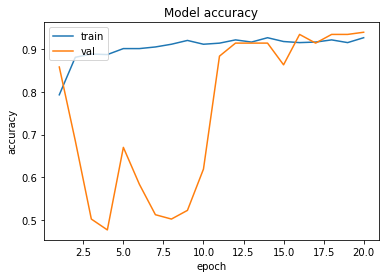

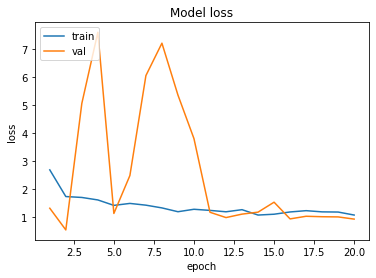

In [ ]:
plot_learningcurve(history,20)